In [2]:
import numpy as np

In [11]:
counter_add = 0
counter_mul = 0
counter_sub = 0

In [9]:
def mat_add(A, B):
    global counter_add, counter_mul
    n = A.shape[0]
    m = A.shape[1]
    C = np.zeros((n, m))
    for row in range(n):
        for col in range(m):
            counter_add += 1
            C[row][col] = A[row][col] + B[row][col]
    return C

In [4]:
def binet(A, B):
    global counter_add, counter_mul
    
    n = A.shape[0]
    m = A.shape[1]
    p = B.shape[1]

    if n == 1:
        C = np.zeros((n, p))
        for col in range(p):
            for i in range(m):
                counter_add += 1
                counter_mul += 1
                C[0][col] += A[0][i] * B[i][col]
        return C
    if p == 1:
        C = np.zeros((n, p))
        for row in range(n):
            for i in range(m):
                counter_add += 1
                counter_mul += 1
                C[row][0] += A[row][i] * B[i][0]
        return C
    
    mid_n = n // 2
    mid_p = p // 2
    mid_m = m // 2
    A11 = A[:mid_n, :mid_m]
    A12 = A[:mid_n, mid_m:]
    A21 = A[mid_n:, :mid_m]
    A22 = A[mid_n:, mid_m:]
    
    B11 = B[:mid_m, :mid_p]
    B12 = B[:mid_m, mid_p:]
    B21 = B[mid_m:, :mid_p]
    B22 = B[mid_m:, mid_p:]
    
    C11 = mat_add(binet(A11, B11), binet(A12, B21))
    C12 = mat_add(binet(A11, B12), binet(A12, B22))
    C21 = mat_add(binet(A21, B11), binet(A22, B21))
    C22 = mat_add(binet(A21, B12), binet(A22, B22))

    C = np.zeros((n, p))
    C[:mid_n, :mid_p] = C11
    C[:mid_n, mid_p:] = C12
    C[mid_n:, :mid_p] = C21
    C[mid_n:, mid_p:] = C22
    
    return C


## Trivial case test

In [12]:
A = [[1,2,3,4],
     [5,6,7,8],
     [9,10,11,12],
     [13,14,15,16]]

B = [[1,2,3,4],
     [5,6,7,8],
     [9,10,11,12],
     [13,14,15,16]]
C = [[90, 100, 110, 120], [202, 228, 254, 280], [314, 356, 398, 440], [426, 484, 542, 600]]


A = np.array(A)
B = np.array(B)


print(np.dot(A, B))
print(binet(A,B))
print(counter_add + counter_mul + counter_sub)

[[ 90 100 110 120]
 [202 228 254 280]
 [314 356 398 440]
 [426 484 542 600]]
[[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]
176


In [15]:
from random import randint
from random import uniform

def randomize_matrix(n):
    return [[uniform(1e-8, 1) for _ in range(n)] for _ in range(n)]

def check_mat(C, C_test, tol=1e-9):
    return np.allclose(C, C_test, atol=tol)

## Verify method for n < <i>test_count</i>

In [16]:
test_count = 50

In [17]:
GREEN = '\033[92m'
RED = '\033[91m'
ENDCOLOR = '\033[0m'
correct_count = 0
for n in range(1, test_count + 1):
    print("Veryfing n =", n)

    A = randomize_matrix(n)
    B = randomize_matrix(n)

    A = np.array(A)
    B = np.array(B)
    C = binet(A, B)
    if check_mat(binet(A, B), np.dot(A, B).tolist()):
        correct_count += 1

print(f'{correct_count}/{test_count} correct')
if correct_count == test_count:
    print(f'{GREEN}Success!{ENDCOLOR}')
else:
    print(f'{RED}Test failed!{ENDCOLOR}')

Veryfing n = 1
Veryfing n = 2
Veryfing n = 3
Veryfing n = 4
Veryfing n = 5
Veryfing n = 6
Veryfing n = 7
Veryfing n = 8
Veryfing n = 9
Veryfing n = 10
Veryfing n = 11
Veryfing n = 12
Veryfing n = 13
Veryfing n = 14
Veryfing n = 15
Veryfing n = 16
Veryfing n = 17
Veryfing n = 18
Veryfing n = 19
Veryfing n = 20
Veryfing n = 21
Veryfing n = 22
Veryfing n = 23
Veryfing n = 24
Veryfing n = 25
Veryfing n = 26
Veryfing n = 27
Veryfing n = 28
Veryfing n = 29
Veryfing n = 30
Veryfing n = 31
Veryfing n = 32
Veryfing n = 33
Veryfing n = 34
Veryfing n = 35
Veryfing n = 36
Veryfing n = 37
Veryfing n = 38
Veryfing n = 39
Veryfing n = 40
Veryfing n = 41
Veryfing n = 42
Veryfing n = 43
Veryfing n = 44
Veryfing n = 45
Veryfing n = 46
Veryfing n = 47
Veryfing n = 48
Veryfing n = 49
Veryfing n = 50
50/50 correct
Success!


Benchmark upper bound matrix size:

In [ ]:
benchmark_size = 200

In [88]:
def clear_counters():
    global counter_add, counter_mul, counter_sub
    counter_add, counter_mul, counter_sub = 0, 0, 0

Time complexity test

In [ ]:
import time

counter_add = 0
counter_mul = 0
counter_sub = 0
add_counters = []
sub_counters = []
mul_counters = []
time_counters = []

for n in range(1, benchmark_size + 1):
    print("Computing n =", n)

    A = randomize_matrix(n)
    B = randomize_matrix(n)
    A = np.array(A)
    B = np.array(B)

    start_time = time.time()
    C = binet(A, B)
    end_time = time.time()
    
    time_counters.append(end_time - start_time)
    add_counters.append(counter_add)
    mul_counters.append(counter_mul)
    sub_counters.append(counter_sub)
    clear_counters()

Computing n = 1
Computing n = 2
Computing n = 3
Computing n = 4
Computing n = 5
Computing n = 6
Computing n = 7
Computing n = 8
Computing n = 9
Computing n = 10
Computing n = 11
Computing n = 12
Computing n = 13
Computing n = 14
Computing n = 15
Computing n = 16
Computing n = 17
Computing n = 18
Computing n = 19
Computing n = 20
Computing n = 21
Computing n = 22
Computing n = 23
Computing n = 24
Computing n = 25
Computing n = 26
Computing n = 27
Computing n = 28
Computing n = 29
Computing n = 30
Computing n = 31
Computing n = 32
Computing n = 33
Computing n = 34
Computing n = 35
Computing n = 36
Computing n = 37
Computing n = 38
Computing n = 39
Computing n = 40
Computing n = 41
Computing n = 42
Computing n = 43
Computing n = 44
Computing n = 45
Computing n = 46
Computing n = 47
Computing n = 48
Computing n = 49
Computing n = 50
Computing n = 51
Computing n = 52
Computing n = 53
Computing n = 54
Computing n = 55
Computing n = 56
Computing n = 57
Computing n = 58
Computing n = 59
Comput

Plot time results

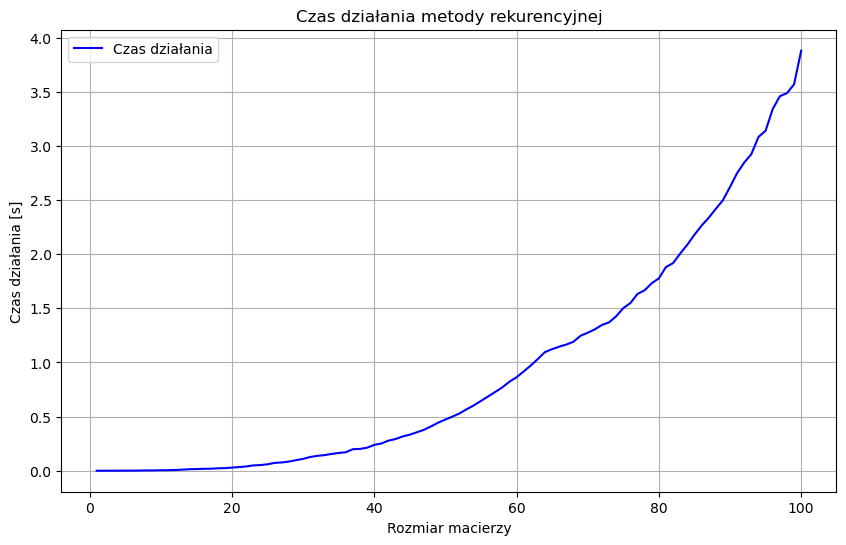

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(time_counters) + 1), time_counters, label="Czas działania", color='blue')
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas działania [s]")
plt.title("Czas działania metody rekurencyjnej")
plt.legend()
plt.grid(True)
plt.show()


Plot floating point operation count

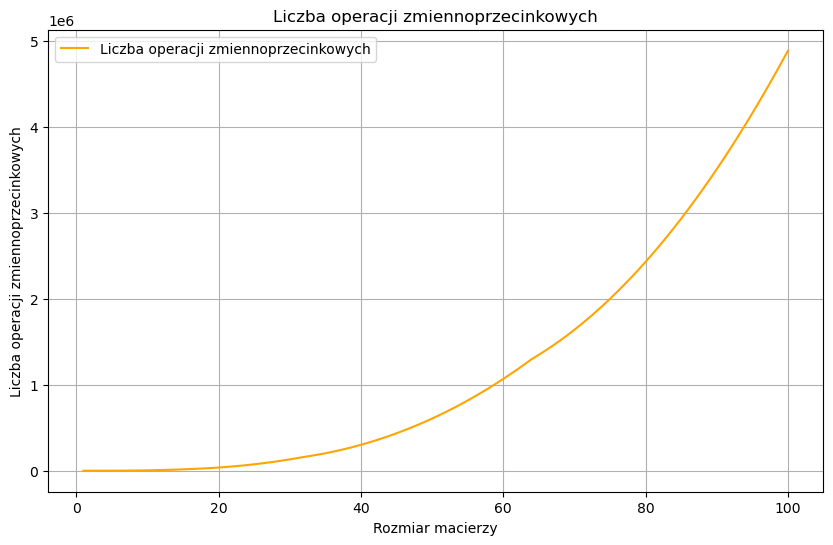

In [110]:

zmiennop = [add + sub + mul for add, sub, mul in zip(add_counters, sub_counters, mul_counters)]
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(zmiennop) + 1), zmiennop, label="Liczba operacji zmiennoprzecinkowych", color='orange')
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Liczba operacji zmiennoprzecinkowych")
plt.title("Liczba operacji zmiennoprzecinkowych")
plt.legend()
plt.grid(True)
plt.show()


Test memory usage

In [ ]:
import tracemalloc

mem_counters = []

for n in range(1, benchmark_size + 1):
    print("Computing n =", n)
    clear_counters()
    
    A = np.array(randomize_matrix(n))
    B = np.array(randomize_matrix(n))

    tracemalloc.start()
    C = binet(A, B)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    mem_counters.append(peak / 10**6)

Computing n = 1
Computing n = 2
Computing n = 3
Computing n = 4
Computing n = 5
Computing n = 6
Computing n = 7
Computing n = 8
Computing n = 9
Computing n = 10
Computing n = 11
Computing n = 12
Computing n = 13
Computing n = 14
Computing n = 15
Computing n = 16
Computing n = 17
Computing n = 18
Computing n = 19
Computing n = 20
Computing n = 21
Computing n = 22
Computing n = 23
Computing n = 24
Computing n = 25
Computing n = 26
Computing n = 27
Computing n = 28
Computing n = 29
Computing n = 30
Computing n = 31
Computing n = 32
Computing n = 33
Computing n = 34
Computing n = 35
Computing n = 36
Computing n = 37
Computing n = 38
Computing n = 39
Computing n = 40
Computing n = 41
Computing n = 42
Computing n = 43
Computing n = 44
Computing n = 45
Computing n = 46
Computing n = 47
Computing n = 48
Computing n = 49
Computing n = 50
Computing n = 51
Computing n = 52
Computing n = 53
Computing n = 54
Computing n = 55
Computing n = 56
Computing n = 57
Computing n = 58
Computing n = 59
Comput

Ploting memory usage

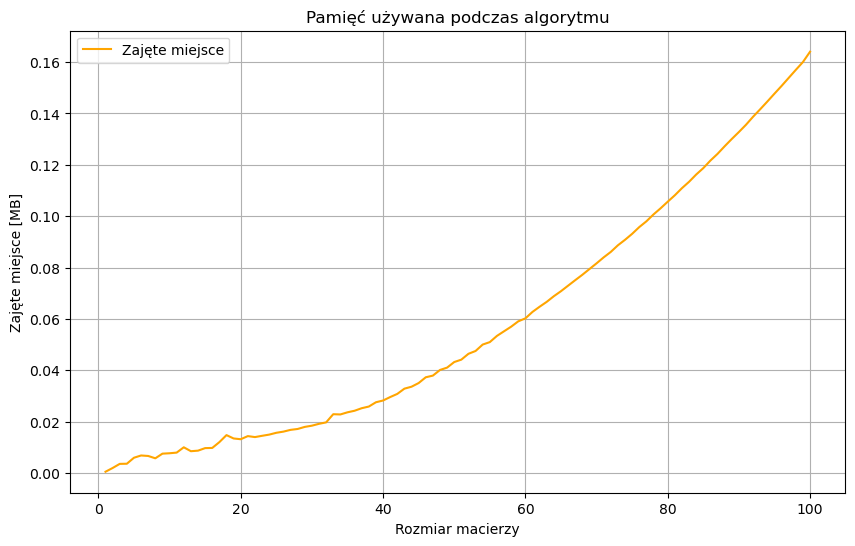

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mem_counters) + 1), mem_counters, label="Zajęte miejsce", color='orange')
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Zajęte miejsce [MB]")
plt.title("Pamięć używana podczas algorytmu")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_23569/1525343016.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_data, y_data, 'bo-', label="Dane pomiarowe", color='blue', markersize=4)
/tmp/ipykernel_23569/1525343016.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit, 'r-', label=f"Dopasowana krzywa: y = {b:.6f} $\\cdot$ x³", color='red', linewidth=2)


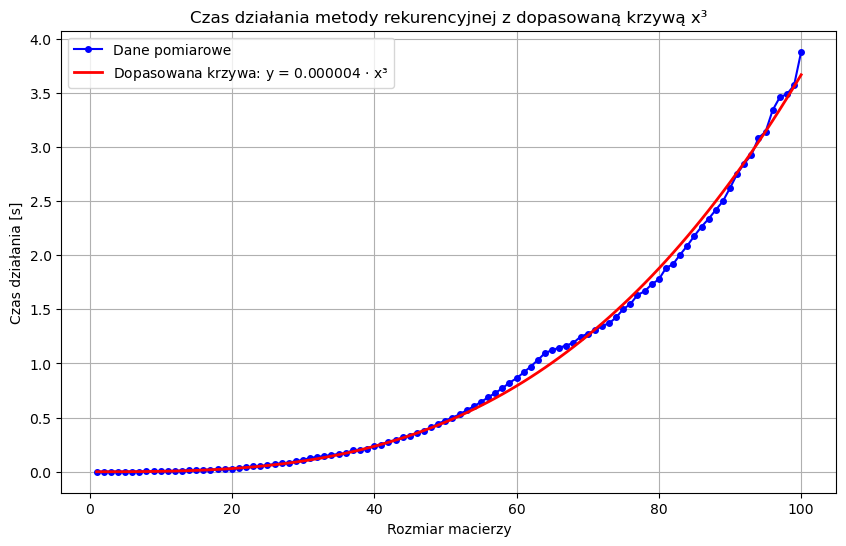

Dopasowana funkcja: y = 0.00000367 * x^3
Współczynnik skalowania: 0.00000367


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

x_data = np.array(range(1, len(time_counters) + 1))
y_data = np.array(time_counters)

b = np.sum(y_data * x_data**3) / np.sum(x_data**6)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = b * x_fit**3

plt.plot(x_data, y_data, 'bo-', label="Dane pomiarowe", color='blue', markersize=4)
plt.plot(x_fit, y_fit, 'r-', label=f"Dopasowana krzywa: y = {b:.6f} $\\cdot$ x³", color='red', linewidth=2)

plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas działania [s]")
plt.title("Czas działania metody rekurencyjnej z dopasowaną krzywą x³")
plt.legend()
plt.grid(True)
plt.show()

print(f"Dopasowana funkcja: y = {b:.8f} * x^3")
print(f"Współczynnik skalowania: {b:.8f}")

In [115]:
# Calculate R-squared to measure goodness of fit
y_pred = b * x_data**3
ss_res = np.sum((y_data - y_pred) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"Współczynnik determinacji R²: {r_squared:.4f}")

Współczynnik determinacji R²: 0.9976


Dopasowana funkcja: y = 0.0000085 * x^2.8033
Współczynnik determinacji R² = 0.9981


/tmp/ipykernel_23569/3740883428.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit, 'r--', label=f'Dopasowanie: {a_fit:.7f}·x^{b_fit:.4f}\nR² = {r_squared:.4f}', color='red')


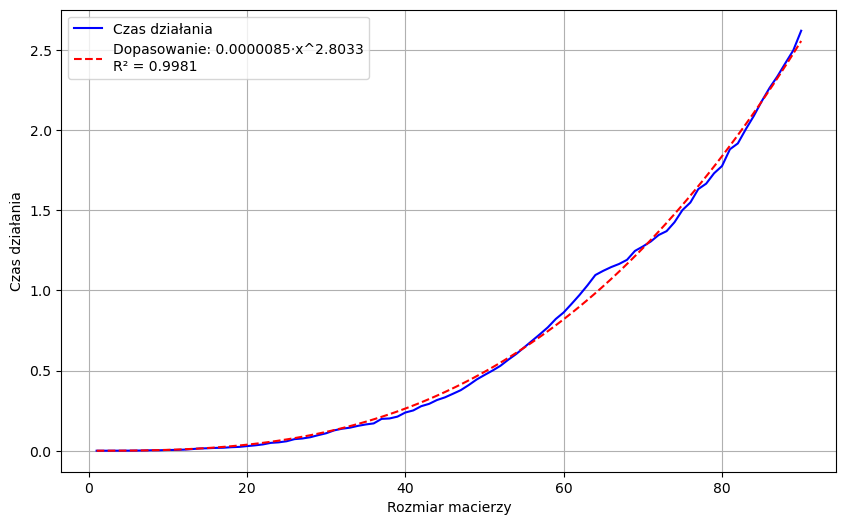

In [121]:
# Extended version with R-squared calculation
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(time_counters[:90]) + 1), time_counters[:90], label="Czas działania", color='blue')

def power_func(x, a, b):
    return a * np.power(x, b)

x_data = np.array(range(1, len(time_counters[:90]) + 1))
y_data = np.array(time_counters[:90])

try:
    params, covariance = curve_fit(power_func, x_data, y_data)
    a_fit, b_fit = params
    
    # Calculate R-squared
    y_pred = power_func(x_data, a_fit, b_fit)
    ss_res = np.sum((y_data - y_pred) ** 2)
    ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = power_func(x_fit, a_fit, b_fit)
    
    plt.plot(x_fit, y_fit, 'r--', label=f'Dopasowanie: {a_fit:.7f}·x^{b_fit:.4f}\nR² = {r_squared:.4f}', color='red')
    
    print(f"Dopasowana funkcja: y = {a_fit:.7f} * x^{b_fit:.4f}")
    print(f"Współczynnik determinacji R² = {r_squared:.4f}")
    
except Exception as e:
    print(f"Błąd podczas dopasowania: {e}")

plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas działania")
# plt.title("Czas działania metody rekurencyjnej z dopasowaniem potęgowym")
plt.legend()
plt.grid(True)
plt.show()